In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#1.Load and prepare data
data=pd.read_csv('CarPrice_Assignment (1).csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#Simple PreProcessing
data=data.drop(['car_ID','CarName'],axis=1) # Remove unnecessary columns
data=pd.get_dummies(data,drop_first=True)
data.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [4]:
#2.Split data
x=data.drop('price',axis=1)
y=data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
#3.Create and train model
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
#4.Evaluate with cross-validation (simple version)
print('Name: Balasurya S')
print('Reg. No: 25000944')
print("\n=== Cross-Validation ===")
cv_scores=cross_val_score(model,x,y,cv=5)
print("Fold R^2 scores:", [f"{score:.4f}" for score in cv_scores])
print(f"Average R^2: {cv_scores.mean():.4f}")

Name: Balasurya S
Reg. No: 25000944

=== Cross-Validation ===
Fold R^2 scores: ['0.6238', '0.6316', '0.3132', '0.3643', '-0.4944']
Average R^2: 0.2877


In [9]:
#5. Test set evaluation
y_pred=model.predict(x_test)
print("\n=== Test Set Performance ===")
print(f"MSE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"R^2: {r2_score(y_test,y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred):.2f}")


=== Test Set Performance ===
MSE: 8482008.48
R^2: 0.8926
MAE: 2089.38


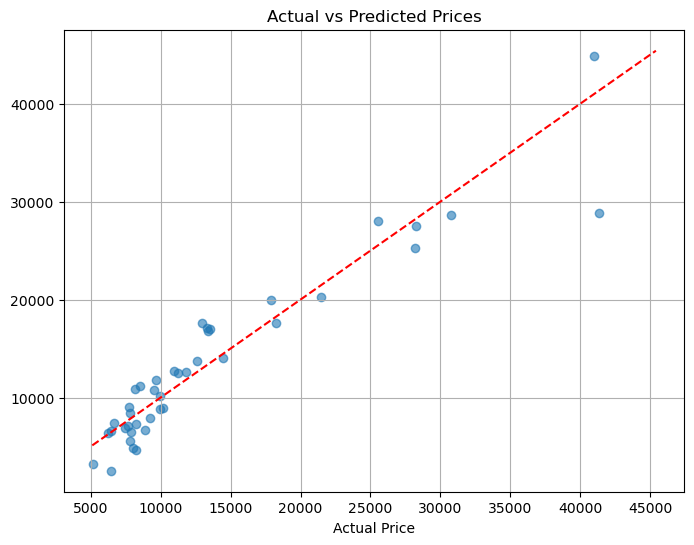

In [10]:
#6. Visualisation
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(),y.max()],'r--')
plt.xlabel("Actual Price")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()